# 🦠 Setup and install


First, **install miniconda** if you don't have a working `conda` installation

- Download an appropriate `miniconda` installer from here:   
  https://docs.conda.io/en/latest/miniconda.html  
  and follow the instractions.

## Steps to setup a environment

1. **Create a new environment** and install `mamba` to speed up subsequent installations  
  `conda create -n eomaps_workshop -c conda-forge python=3.9 mamba --yes`
2. **Activate the environment**:  
  `activate eomaps_workshop`
3. **Install required packages**  
  `mamba install -c conda-forge eomaps netcdf4 rioxarray numpy=1.23.5 --yes`
4. (optionally) install the `spyder ide`  
  `mamba install -c conda-forge spyder pyzmq=24.0.1 ipython=7.33 --yes`  
  <font size="1">  (using `pyzmq=24.0.1` and `ipython=7.33` avoids autocompletion issues with the latest versions)</font>
5. (optionally) install jupyter lab (and ipympl for interactive inline-plots)  
  `mamba install -c conda-forge jupyterlab ipympl --yes`  
  
5. Wait for all commands to complete and then type `spyder` and hit enter to start the `spyder ide`

----


> **... or if you prefer to do all in 1 line** (requires `mamba` installed in the base-env):  
> `mamba create -n eomaps_workshop -c conda-forge python=3.9 mamba eomaps netcdf4 rioxarray spyder pyzmq=24.0.1 ipython=7.33 --yes`


<hr style="border:3px solid black">

# 🌑 Getting started with EOmaps <img alt=EOmaps src=https://raw.githubusercontent.com/raphaelquast/EOmaps/dev/docs/_static/logo.png width=15% align="right">

<!---
### Why EOmaps?

- whats the difference to `cartopy`?
  - `cartopy` is nice to create static maps but lacks interactivity
  - `EOmaps` adds another layer on top of `cartopy` to support interactivity
<br><br>

- Many other packages exist that support interactivity out of the box... why create a new one?  
  (`plotly-geo`, `geoviews`, `folium`, `earthpy`, `geemap`, `leafmap` ...)

  - they are almost all just wrappers for javascript (e.g. `leaflet`) or `google-earth-engine`  
    and focused for use in browsers. 
  
  - `EOmaps` is based on `matplotlib/cartopy` and focuses on "offline" usage...   
    (but supports WebMaps and features from NaturalEarth etc.)
    - highly customizable 
    - easy interface
    - python.

--->
  

<div style="display: inline-block">
<hr style="border:1px solid black" align="left">

> **❗ Make sure to have a look at the extensive [📖 Documentation](https://eomaps.readthedocs.io/en/latest/?badge=latest) with a lot of examples (incl. source-code) ❗**

<hr style="border:1px solid black" align="left">
</div>

<hr style="border:3px solid black">

# 🌒 Basics - Lets create a map!

EOmaps provides many (highly customizable) features that can be added to the map:
- **North-Arrows**
- **Scalebars**
- **Gridlines**
- A interface for features from [NaturalEarth](https://www.naturalearthdata.com/)
- A interface to many open-access **WebMap Services**
- Functionalities to add **Annotations**, **Markers**, **Lines**, **Logos** etc.
- ...

In [1]:
#%matplotlib widget
#%matplotlib qt
%matplotlib inline
from eomaps import Maps
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
print_snapshots = (plt.get_backend() != 'module://ipympl.backend_nbagg')

D:\python_modules\eomaps\eomaps\eomaps.py:156: UserWarning: EOmaps disables matplotlib's interactive mode (e.g. 'plt.ioff()') for the backend module://matplotlib_inline.backend_inline.
Call `m.snapshot()` to print a static snapshot of the map to a Jupyter Notebook cell (or an IPython console)!
  warnings.warn(


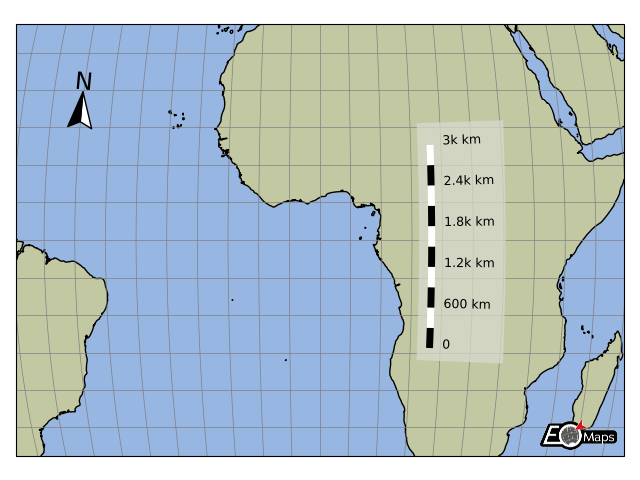

In [2]:
m = Maps(Maps.CRS.Mollweide())
m.set_extent((-50, 50, -20, 20))

m.add_feature.preset.coastline()
m.add_feature.preset.ocean()
m.add_feature.physical.land(fc="#c2c9a2")

m.add_gridlines(5, c=".5")
m.add_compass(pos=(.105, .76), scale=12, style="north arrow")
s = m.add_scalebar(
    auto_position=(0.68, 0.25),
    autoscale_fraction=0.45, 
    patch_props=dict(fc="#d8dace", ec="none", alpha=0.75))

m.add_logo()

if print_snapshots: 
    m.snapshot(clear=True, transparent=True)

# 🌓 A map never comes alone... multiple maps in one figure

- To **add additional maps** to a figure, use `m2 = m.new_map(...)`  
  (or `m2 = Maps(f=m.f, ...)` if EOmaps-version < v6.1)
- To **create inset-maps** that highlight specific areas on the map, use `m.new_inset_map()`

In [ ]:
m = Maps(ax=221)
m.add_feature.preset.coastline()

m2 = m.new_map(ax=222)
m2.add_feature.preset.countries(zorder=0)

m3 = m.new_map(ax=223, crs=Maps.CRS.Mollweide())
m3.add_feature.physical.land(fc="#97c1aa")

m4 = m.new_map(ax=224, crs=Maps.CRS.InterruptedGoodeHomolosine())
m4.add_feature.preset.ocean()

m5 = m.new_map(ax=335, crs=Maps.CRS.Orthographic(-60, -20), keep_on_top=True)
m5.add_feature.preset.ocean()
m5.add_feature.physical.land(fc="darkgreen", ec="none")

# --- create an InsetMap
m2i = m2.new_inset_map(xy=(-60,-15), radius=(35, 50), 
                       inset_crs=Maps.CRS.Stereographic(), shape="rectangles", 
                       plot_position=(.85, .8), plot_size=0.35, 
                       indicate_extent=False)
m2i.add_feature.physical.ocean(fc="lightblue")
m2i.add_feature.physical.land(fc="g", ec="k")
m2i.add_gridlines(lw=0.25)
for i in (m, m2, m3, m4, m5):
    m2i.indicate_inset_extent(i, fc=(1,0,0,.25))

if print_snapshots: 
    m.snapshot(clear=True, transparent=False)

# 🌔 Compare and combine - Layer management

Every `Maps` object is assigned to a layer (accessible via `m.layer`)  
A map can have multiple layers and each layer can have multiple `Maps` objects.



- To **create a new layer** on a map, use `m2 = m.new_layer(...)`

  - If no explicit layer-name is provided, the new `Maps` object will use the same layer as the initial one!
  
- To **show** a specific layer or **transparently overlay** multiple layers use `m.show_layer(...)`

In [ ]:
m = Maps(figsize=(3,1))
m.add_compass(layer="second", pos=(.1,.1), scale=7, style="north arrow")

m1 = m.new_layer("first")
m1.add_feature.preset.coastline()
m1.add_feature.preset.land()

m1_1 = m1.new_layer()   # A Maps-object on the same layer as m1
m1_1.add_marker(xy=(23, 25), radius=60, ec="k", fc="r", permanent=True)

m2 = m.new_layer("second")
m2.add_feature.preset.ocean()
m2.add_marker(xy=(-50, -30), radius=20, ec="k", fc="#58419c", permanent=True)

# -----------------------------
print("first layer")
m.snapshot(m1.layer, transparent=True)

print("second layer")
m.snapshot(m2.layer, transparent=True)

print("overlay of second layer on top of first")
m.snapshot(m1.layer, m2.layer, transparent=True)

print("overlay of first layer on top of second")
m.snapshot(m2.layer, m1.layer, transparent=True)

print("semi-transparent overlay of second layer on top of first")
m.snapshot(m1.layer, (m2.layer, .75), transparent=True)

print("semi-transparent overlay of first layer on top of second")
m.snapshot(m2.layer, (m1.layer, .75), transparent=True)


# 🌕 Data Visualization

EOmaps aims to make visualization of geographical datasets as simple as possible.

To plot a dataset, execute the following steps:


0. (optional) set the extent of the map via `m.set_extent()`
1. **Assign the data** to a `Maps`-object via `m.set_data(...)`
2. (optional) **set a classification-scheme** via `m.set_classify.<SCHEME>(...)`
3. (optional) **select a shape** to represent the data via `m.set_shape.<SHAPE>(...)`
4. **Plot the data** by calling `m.plot_map(...)`

In [ ]:
# functions to create random datasets
def data1D(s=500):
    lon = np.random.randint(-150, 150, s)
    lat = np.random.randint(-75, 68, s)
    data = np.random.randint(0, 100, s)
    return dict(data=data, x=lon, y=lat)

def data2D(sx=40, sy=30):
    lon, lat = np.linspace(-160, 50, sx), np.linspace(-70, 80, sy)
    lon, lat = np.meshgrid(lon, lat)
    data = lon**2 + lat**2 + np.cos(lon)
    return dict(data=data, x=lon, y=lat)

def data1D2D(sx=20, sy=30):
    lon = np.linspace(-150,150, sx)
    lat = np.linspace(-75, 68, sy)
    data = np.random.randint(0, 10000, (lon.size, lat.size))
    return dict(data=data, x=lon, y=lat)

In [ ]:
m = Maps(ax=221, figsize=(8, 6))
m.add_feature.physical.coastline(fc="none", ec="w", lw=0.5)

# -------------------------------- first map 
m1 = m.new_layer()
m1.set_data(**data1D())
m1.set_classify.EqualInterval(k=5)
m1.set_shape.voronoi_diagram()
m1.plot_map(indicate_masked_points=True)
m1.add_colorbar()

# -------------------------------- second map 
m2 = m.new_map(ax=222)
m2.add_feature.physical.coastline(fc="none", ec="k", lw=0.5)
m2.set_data(**data2D())
m2.set_classify.EqualInterval(k=5)
m2.set_shape.ellipses()
m2.plot_map(vmin=100, vmax=35000, cmap="tab20")
cb = m2.add_colorbar()
cb.tick_params(rotation=90)

# -------------------------------- third map 
m3 = m.new_map(ax=223)
m3.add_feature.physical.coastline(fc="none", ec="k", lw=0.5)
m3.add_feature.preset.ocean()

m3.set_data(**data1D2D(100, 100))
m3.set_classify.EqualInterval(k=5)
m3.set_shape.ellipses()
m3.plot_map(set_extent=False, cmap="cividis")
m3.add_colorbar()

# -------------------------------- inset map for third map 
m3i = m3.new_inset_map(xy=(5,45), radius=15e5, shape="geod_circles",
                       inset_crs=3035,
                       plot_position=(.75, .21), plot_size=.38,
                       indicate_extent=dict(lw=2))
m3i.add_feature.preset.land()
m3i.add_feature.preset.ocean()
m3i.add_gridlines(lw=0.25, zorder=0)


m3i.inherit_data(m3)
m3i.inherit_classification(m3)
m3i.set_shape.ellipses(radius=0.5, radius_crs=4326)
m3i.plot_map()
m3i.text(.5,1.05, "Inset Map", transform=m3i.ax.transAxes, fontsize=12)

m.subplots_adjust(left=0.01, right=.99, bottom=0.01, top=.99, hspace=.25)

if print_snapshots: 
    m.snapshot(clear=True)

## Dealing with large datasets

> If you are only interested in an area that contains a subset of the data, make sure to call `m.set_extent(...)` **before** plotting the data!  
> This way, only the visible subset of the data is plotted which can result in a tremendous speedup!


- If the data is 2D, the `raster` shape is capable of visualizing large datasets (up to several million datapoints) in reasonable time

----

But my dataset is **extremely large**... what should I do? $\Rightarrow$ **Use data shading!**

Once a certain amount of datapoints is reached, plotting all of them makes little sense...  
(you most probably already reached the limit of dpi on your screen)


> If data-shading is used, a **dynamic aggregation** of the data based on the  
> figure dpi and the visible extent is plotted (via the `datashader` package).  
> ❗❗ **NOTE: This is extremely fast but can result in a very different (and possibly misleading) appearance of the data!!**


- use `m.set_shape.shade_raster()` for 2D data
- use `m.set_shape.shade_points()` for 1D data


In [ ]:
m = Maps(figsize=(6, 3))
m.all.add_feature.preset.coastline()

m1 = m.new_layer("raster")
m1.set_shape.raster()
m1.set_data(**data1D2D(2000, 2000))
m1.plot_map()
m1.add_colorbar(extend="neither")

print("\nUsing 'raster' as plot shape")
m.snapshot("raster")

m2 = m.new_layer("shade_raster")
m2.add_feature.preset.coastline()
m2.inherit_data(m1)
m2.set_shape.shade_raster()
m2.plot_map()
m2.add_colorbar(extend="neither")


print("Using 'shade_raster' as plot shape")
m.snapshot("shade_raster")

# 🌍 Interactivity - Using maps for data analysis 

> Interactive plots require using an interactive matplotlib backend!

